### Hello and welcome to this kernel where we will explore the iris dataset, use predictive modeling to predict the class of the species given its features and then will experiment with the dataset to improve the results.

## Know your data

At first, let's **import the packages and methods**, and then we will see how our data looks like and what to do with it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams.update({'font.size': 12})    # It just updates the fontsize to be used in matplotlib plots to 12 which is 10 by default.

Now let's **import the data.**

Iris dataset has a column "Id" which is (you can say) a serial number given to the samples, I have used that column as index in our dataframe by passing the column name as an argument to the "index_col" parameter in `pandas.read_csv()` method which makes it the index while making a dataframe.

In [2]:
data = pd.read_csv('../input/Iris.csv', index_col="Id")
data.head()  # Checking the first 5 samples from the imported data.

SepalLengthCm  SepalWidthCm     ...       PetalWidthCm      Species
Id                                  ...                                
1             5.1           3.5     ...                0.2  Iris-setosa
2             4.9           3.0     ...                0.2  Iris-setosa
3             4.7           3.2     ...                0.2  Iris-setosa
4             4.6           3.1     ...                0.2  Iris-setosa
5             5.0           3.6     ...                0.2  Iris-setosa

[5 rows x 5 columns]

Checking out the **number of samples** and columns in our dataset.

In [3]:
print("Number of samples in our dataset: ", data.shape[0])
print("Number of columns in our dataset: ", data.shape[1])

Number of samples in our dataset:  150
Number of columns in our dataset:  5


We got 5 columns in our dataset to work on this supervised learning problem.

Let's check the **data type of the columns.**

In [4]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

We have 4 continuous variables which are the independent variables:
>1. SepalLengthCm 
>2. SepalWidthCm
>3. PetalLengthCm
>4. PetalWidthCm

I don't know much about flowers to explain what is sepal length/width, petal length/width :p, but all of them contains the length of the  parts (given by the column name) in flowers and all of them are measured in centimeter.

And the dependent or target variable which contains the output class for each sample is:
>Species

In [5]:
data.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

We have **no** Null/NaN values in our dataset.

BTW the information we got in above two steps could be done in a single step by calling the method `info()` on the dataframe.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### What are the classes in our dataset?

In [7]:
classes = data["Species"].unique()
print("We have {} classes which are {}".format(len(classes), classes))

We have 3 classes which are ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### How many examples we have per class?

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64


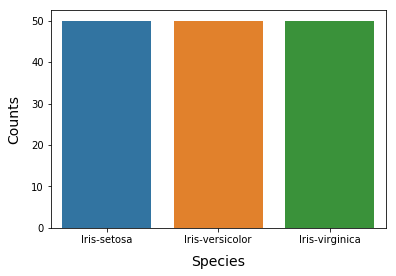

In [8]:
print(data["Species"].value_counts())

sns.countplot(data["Species"])
plt.xlabel("Species", labelpad=10, fontsize=14)
plt.ylabel("Counts", labelpad=10, fontsize=14)
plt.show()

The dataset contains equal number of samples from all the 3 classes. A totally balanced dataset!

## Univariate Analysis

When it comes to continuous features the samples can take any values over a range so density plots or histograms are useful in such situations.

We plot the distribution of every feature/independent variables using histograms which plots the frequencies/counts as bars over equal ranges (or, intervals).

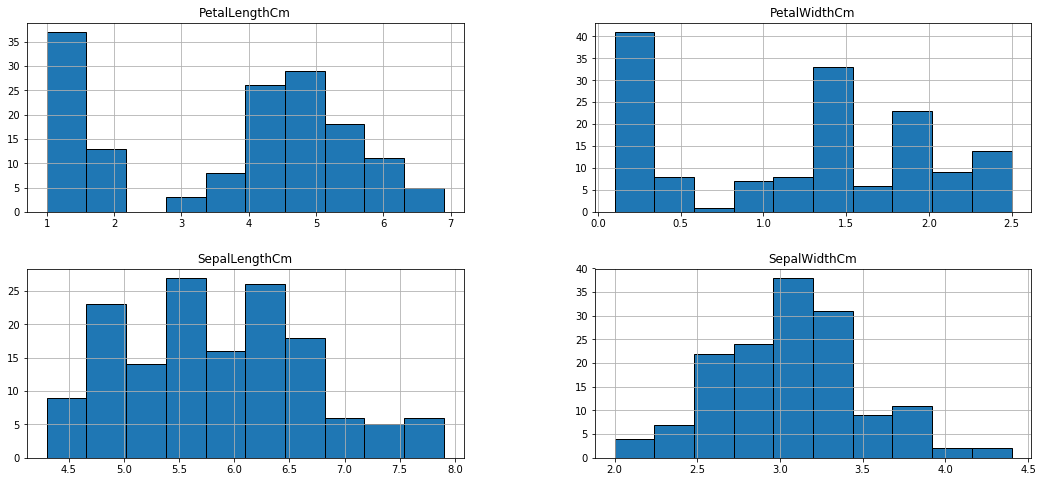

In [9]:
data.hist(figsize=(18,8), edgecolor="black")
plt.show()

Let's check the distribution of the features using other types of plots:

**Box and Whisker Plot**
>It plots the distribution of data according to quartiles and also plots the outliers(samples which takes unusual values).

**Kernel Density Estimation Plot**
>It is a variation of histogram which plots a smoother distribution of data which helps in determining the shape of distribution.

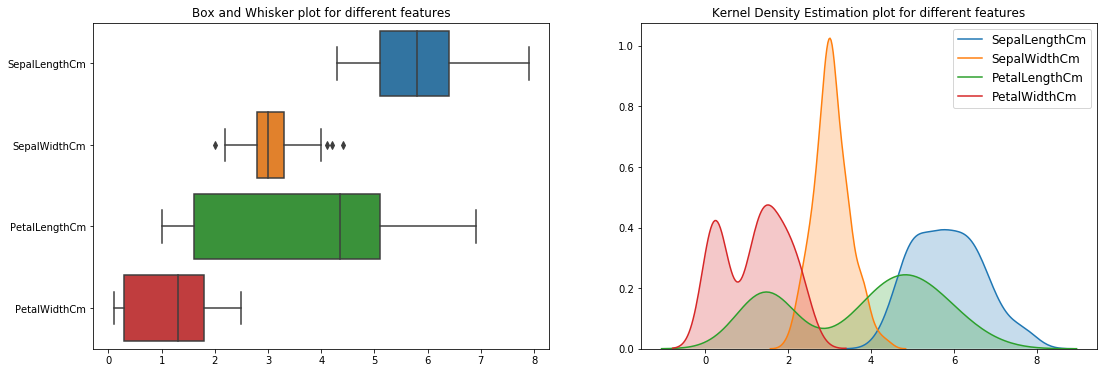

In [10]:
fig = plt.figure(figsize=(18,6))

ax1 = fig.add_subplot(121)
sns.boxplot(data=data, orient="h", ax=ax1)
ax1.set_title("Box and Whisker plot for different features")

ax2 = fig.add_subplot(122)
sns.kdeplot(data["SepalLengthCm"], shade=True, shade_lowest=True, ax=ax2)
sns.kdeplot(data["SepalWidthCm"], shade=True, shade_lowest=True, ax=ax2)
sns.kdeplot(data["PetalLengthCm"], shade=True, shade_lowest=True, ax=ax2)
sns.kdeplot(data["PetalWidthCm"], shade=True, shade_lowest=True, ax=ax2)
ax2.set_title("Kernel Density Estimation plot for different features")

ax2.legend(fontsize=12)

plt.show()

From both the distribution plots we can see that:

>**PetalLengthCm** values are distributed over a long range.

>**SepalWidthCm** values are concentrated in a small range compared to others and it has few outliers too.

## Bivariate Analysis

Now, let's check the relation between the species and other features.

In [11]:
fig, ax = plt.subplots(1,4, figsize=(18,6))

setosa = data[data["Species"]=="Iris-setosa"]
versicolor = data[data["Species"]=="Iris-versicolor"]
virginica = data[data["Species"]=="Iris-virginica"]

sns.kdeplot(setosa["PetalWidthCm"], label="setosa", shade=True, ax=ax[0])
sns.kdeplot(versicolor["PetalWidthCm"], label="versicolor", shade=True, ax=ax[0])
sns.kdeplot(virginica["PetalWidthCm"], label="virginica", shade=True, ax=ax[0])
ax[0].set_title("Species vs PetalWidthCm")
ax[0].legend()

sns.kdeplot(setosa["PetalLengthCm"], label="setosa", shade=True, ax=ax[1])
sns.kdeplot(versicolor["PetalLengthCm"], label="versicolor", shade=True, ax=ax[1])
sns.kdeplot(virginica["PetalLengthCm"], label="virginica", shade=True, ax=ax[1])
ax[1].set_title("Species vs PetalLengthCm")
ax[1].legend()

sns.kdeplot(setosa["SepalWidthCm"], label="setosa", shade=True, ax=ax[2])
sns.kdeplot(versicolor["SepalWidthCm"], label="versicolor", shade=True, ax=ax[2])
sns.kdeplot(virginica["SepalWidthCm"], label="virginica", shade=True, ax=ax[2])
ax[2].set_title("Species vs SepalWidthCm")
ax[2].legend()

sns.kdeplot(setosa["SepalLengthCm"], label="setosa", shade=True, ax=ax[3])
sns.kdeplot(versicolor["SepalLengthCm"], label="versicolor", shade=True, ax=ax[3])
sns.kdeplot(virginica["SepalLengthCm"], label="virginica", shade=True, ax=ax[3])
ax[3].set_title("Species vs SepalLengthCm")
ax[3].legend()

plt.show()

**1. PetalWidthCm**
>We can see that Iris-setosa take totally different values but there is some overlap between the distribution of Iris-versicolor and Iris-virginica.

**2. PetalLengthCm**
>Here also Iris-setosa take unique values and there is some intersection between the other two species.

**3. SepalWidthCm**
>All the species' distribution is highly overlapped.

**4. SepalLegthCm**
>Iris-setosa's and Iris-virginica's distribution are different but Iris-versicolor's distribution has overlapped with the other two.

*PetalLengthCm and PetalWidthCm is going to be crucial for classifying the species of the samples*

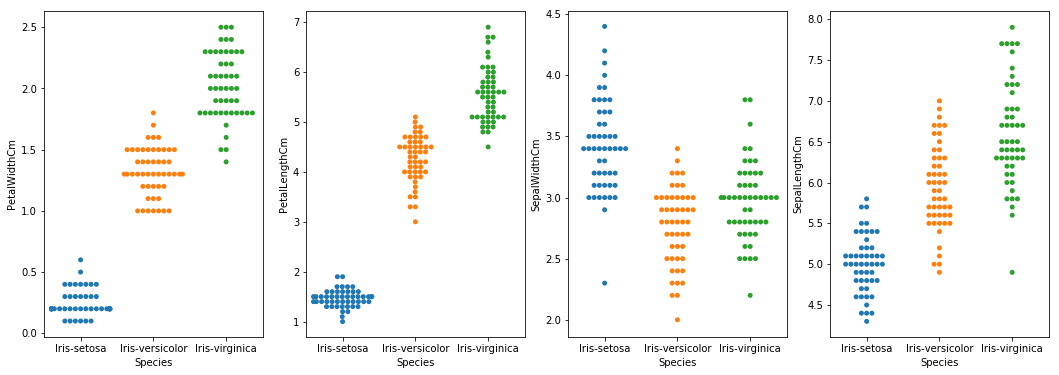

In [12]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(141)
sns.swarmplot(x="Species", y="PetalWidthCm", data=data, ax=ax1)
ax2 = fig.add_subplot(142)
sns.swarmplot(x="Species", y="PetalLengthCm", data=data, ax=ax2)
ax3 = fig.add_subplot(143)
sns.swarmplot(x="Species", y="SepalWidthCm", data=data, ax=ax3)
ax4 = fig.add_subplot(144)
sns.swarmplot(x="Species", y="SepalLengthCm", data=data, ax=ax4)

plt.show()

These are swarm plots which is like scatter plot to visualize our samples against a categorical feature("Species" in our case).

These plots shows the same thing we have seen in the distribution plots.

### Relation between the independent variables

**SepalLengthCm vs Other features**

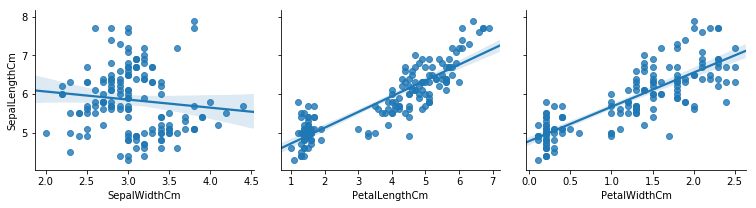

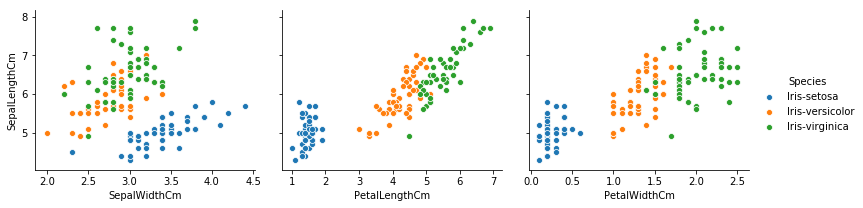

In [13]:
sns.pairplot(data, x_vars=["SepalWidthCm", "PetalLengthCm", "PetalWidthCm"], y_vars="SepalLengthCm", kind="reg", height=3, aspect=1.2)
sns.pairplot(data, x_vars=["SepalWidthCm", "PetalLengthCm", "PetalWidthCm"], y_vars="SepalLengthCm", hue="Species", kind="scatter", height=3, aspect=1.2)
plt.show()

There is weak negative (as the slope of the regression line is negative) correlation between SepalLengthCm and SepalWidthCm but a good positive correlation with other two features.

In the 2nd row we plotted the relation between the features along with visualizing the different Species.

**SepalWidthCm vs Other features**

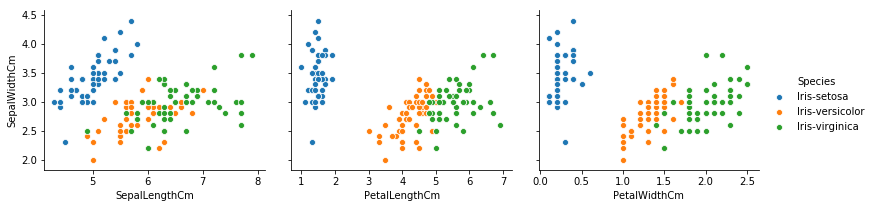

In [14]:
sns.pairplot(data, x_vars=["SepalLengthCm", "PetalLengthCm", "PetalWidthCm"], y_vars="SepalWidthCm", kind="reg", height=3, aspect=1.2)
sns.pairplot(data, x_vars=["SepalLengthCm", "PetalLengthCm", "PetalWidthCm"], y_vars="SepalWidthCm", hue="Species", kind="scatter", height=3, aspect=1.2)
plt.show()

SepalWidthCm shows weak negative correlation with all the other features and the samples are very much spread out.

**PetalLengthCm vs Other features**

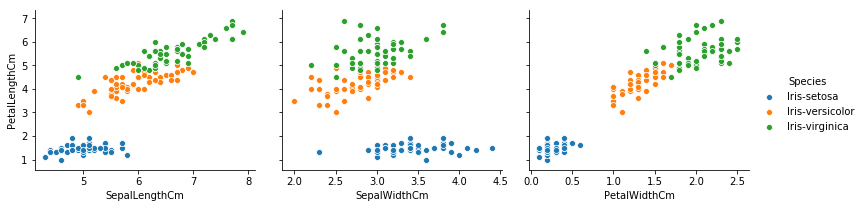

In [15]:
sns.pairplot(data, x_vars=["SepalLengthCm", "SepalWidthCm", "PetalWidthCm"], y_vars="PetalLengthCm", kind="reg", height=3, aspect=1.2)
sns.pairplot(data, x_vars=["SepalLengthCm", "SepalWidthCm", "PetalWidthCm"], y_vars="PetalLengthCm", hue="Species", kind="scatter", height=3, aspect=1.2)
plt.show()

PetalLengthCm shows strong positive correlation with PetalWidthCm and the samples are separable(visually) through their relation.

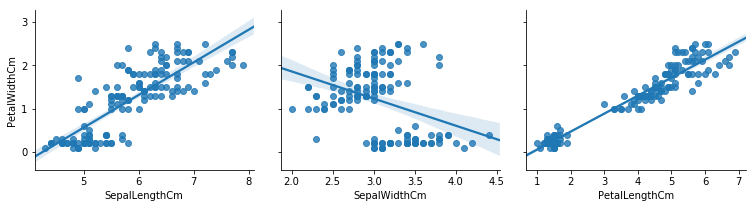

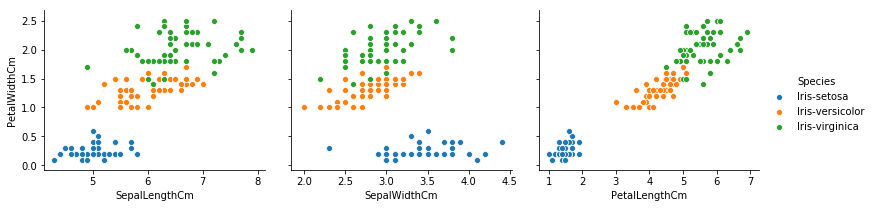

In [16]:
sns.pairplot(data, x_vars=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm"], y_vars="PetalWidthCm", kind="reg", height=3, aspect=1.2)
sns.pairplot(data, x_vars=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm"], y_vars="PetalWidthCm", hue="Species", kind="scatter", height=3, aspect=1.2)
plt.show()

Summary:

1. SepalWidthCm shows weak negative correlation with all the other features
2. PetalLengthCm and PetalWidthCm shows strong positive correaltion and the samples are separable across the 3 classes, except some overlap between Iris-versicolor and Iris-virginica.
3. SepalLengthCm is positively correlated with PetalLengthCm and PetalWidthCm. Iris-setosa is isolated but Iris-versicolor and Iris-virginica has overlapped.

### Correlation between the features in numbers

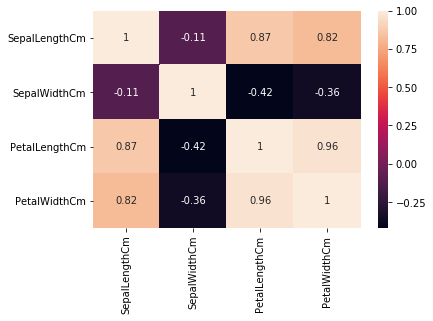

In [17]:
sns.heatmap(data.corr(), annot=True)
plt.show()

A correlation as high as 0.96 which is almost equal to perfectly correlated (i.e., correlation=1) so both the features produces the same information.
>It's like you are an officer in crime branch and two of your informers always gives you the same information before executing an operation, so you are like..(*thinks*) REMOVE ONE OF THE INFORMER as it does not helps, feature in our case.

But for now we train with all the features and will try to experiment later to predict the species, before that let's **prepare our data to train the models**.

## Predictive Modeling

In [18]:
X = data.iloc[:, :-1]    # Here we select all the columns except the last one.
y = data.iloc[:, -1]    # Here, selecting the last column as the output column.
print('Shape of X : ', X.shape)
print('Shape of y : ', y.shape)

Shape of X :  (150, 4)
Shape of y :  (150,)


We will be trying Logistic Regression, KNN, SVC with linear kernel, rbf kernel and Decision Tree.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("SVC_linear", SVC(kernel="linear", gamma='auto')))
models.append(("SVC_rbf", SVC(kernel="rbf", gamma='auto')))
models.append(("DT", DecisionTreeClassifier()))

In [20]:
from sklearn.model_selection import KFold

seed = 22
scoring = 'accuracy'

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [21]:
from sklearn.model_selection import cross_validate

results = []
model_name = []

for name, model in models:
    scores = cross_validate(model, X, y, cv=kfold, scoring=scoring)
    test_score = scores["test_score"]
    results.append(test_score.mean())
    model_name.append(name)
    msg = "{:^12s}: {:.3f} ±({:.2f})".format(name, test_score.mean(), test_score.std())
    print(msg)

     LR     : 0.940 ±(0.05)
    KNN     : 0.953 ±(0.06)
 SVC_linear : 0.967 ±(0.04)
  SVC_rbf   : 0.973 ±(0.03)
     DT     : 0.953 ±(0.04)


SVC linear kernel uses a linear decision boundary to classify the samples.<br>SVC rbf kernel uses a non-linear decision boundary to classify the samples.

For our classification problem both the algorithms performed well as we saw the samples were linearly separable even though Iris-versicolor and Iris-virginica had some overlap.

*We calculated the standard deviation to show the uncertainity associated with the measurement.*

Now, we should try some hypertuning to see if we can improve the accuracy.

Before doing that lets keep 20% of the data separate so that we can evaluate our model on totally unseen data.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=seed)  #Splitting the data into train and test set.
print('No. of training examples : ', X_train.shape[0])
print('No. of test examples : ', X_test.shape[0])

No. of training examples :  120
No. of test examples :  30


In [23]:
from sklearn.model_selection import GridSearchCV

C = np.arange(0.1, 2, 0.1)  # We will try different values of C between 0.1 and 1.9
kernel = ["linear", "rbf"]
param_grid = {"C":C, "kernel":kernel}

gs = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=kfold, verbose=True)
gs.fit(X_train, y_train)

print("Best Score: ", gs.best_score_)
print(gs.best_estimator_)

Fitting 10 folds for each of 38 candidates, totalling 380 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Score:  0.9833333333333333
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    1.2s finished


In [24]:
from sklearn.metrics import classification_report

model = gs.best_estimator_

print(" GridSearchCV best estimator ".center(50, "="))

print("Training set classification report".center(50, "_"))
print(classification_report(y_train, model.predict(X_train)))

print("Test set classification report".center(50, "_"))
print(classification_report(y_test, model.predict(X_test)))

========== GridSearchCV best estimator ===========
________Training set classification report________
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        44
Iris-versicolor       1.00      0.97      0.99        40
 Iris-virginica       0.97      1.00      0.99        36

       accuracy                           0.99       120
      macro avg       0.99      0.99      0.99       120
   weighted avg       0.99      0.99      0.99       120

__________Test set classification report__________
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.86      0.92        14

       accuracy                           0.93        30
      macro avg       0.94      0.95      0.94        30
   weighted avg       0.94      0.93      0.93        30



We use the classification report to evaluate our model. It gives the precision, recall and f1-score for each class separately along with the overall accuracy.

Iris-setosa has f1-score of 1 for both train and test set. It is clear from the visualizations we saw earlier that setosa was totally separate from all other classes so was very accurately predictable.

Train set has an accuracy of 99% and Test set has an accuracy of 93%. Looks like a little overfit, let's see if we can generalize further.

In [25]:
# Storing the value of C and kernel to use in other SVC() models when trying something different.

C = gs.best_estimator_.C
kernel = gs.best_estimator_.kernel

## Experimenting with the dataset

Since there was a very high correlation between PetalWidthCm and PetalLengthCm, lets make a new feature by taking the product of both the features, then drop both the features and use it to train our classifier.

In [26]:
data_copy = data.copy()  # Making a copy of the dataframe
data_copy["pwidth_plength"] = data_copy["PetalWidthCm"] * data_copy["PetalLengthCm"]  # Adding a new feature to the dataframe as described above
data_copy.drop(columns=["PetalWidthCm", "PetalLengthCm"], inplace=True)  # Droping both the columns
data_copy.head()

SepalLengthCm  SepalWidthCm      Species  pwidth_plength
Id                                                          
1             5.1           3.5  Iris-setosa            0.28
2             4.9           3.0  Iris-setosa            0.28
3             4.7           3.2  Iris-setosa            0.26
4             4.6           3.1  Iris-setosa            0.30
5             5.0           3.6  Iris-setosa            0.28

In [27]:
y_copy = data_copy["Species"]
X_copy = data_copy.drop(columns="Species")
X_copy_train, X_copy_test, y_copy_train, y_copy_test = train_test_split(X_copy, y_copy, test_size=0.2, random_state=seed)

In [28]:
svc = SVC(C=C, kernel=kernel)
svc.fit(X_copy_train, y_copy_train)

print(" Combined PetalWidthCm and PetalLengthCm ".center(50, "="))

print("Training set classification report".center(50, "_"))
print(classification_report(y_copy_train, svc.predict(X_copy_train)))

print("Test set classification report".center(50, "_"))
print(classification_report(y_copy_test, svc.predict(X_copy_test)))

==== Combined PetalWidthCm and PetalLengthCm =====
________Training set classification report________
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        44
Iris-versicolor       0.95      0.95      0.95        40
 Iris-virginica       0.94      0.94      0.94        36

       accuracy                           0.97       120
      macro avg       0.96      0.96      0.96       120
   weighted avg       0.97      0.97      0.97       120

__________Test set classification report__________
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.97        30
      macro avg       0.97      0.98      0.97        30
   weighted avg       0.97      0.97      0.97        30



Wow it worked, now both the Training and Test accuracy is 97%.

Here we dropped the PetalWidthCm and PetalLengthCm features after taking their product, you can experiment with other things and see the result.

### Removing the outliers

We saw earlier that SepalWidthCm had some outliers, let's try to train a model after removing the outliers and see what results we can get.

**How a sample is determined to be an outlier?**

Lets understand few things before we can find outliers. We can divide the distribution of our data into 
1. **First quartile(Q1)** which contains the 25% of the total data. The line where the box starts in the box plot below is Q1.
2. **Second quartile(Q2)** which contains the 50% of the total data. The line you see in the middle is the median line or Q2.
3. **Third quartile(Q3)** which contains the 75% of the total data. The line where the box ends is Q3.

**Inter Quartile Range(IQR)** is the range between Q3 and Q1. The box in the box plot below shows the IQR. It's given by the formula
>IQR = Q3 - Q1

The samples that takes value less than (Q1 - 1.5 &ast; IQR) and values greater than (Q3 + 1.5 &ast; IQR) are treated as outliers. So we will expel those samples from our previously modified dataset and see how it affects our prediction.

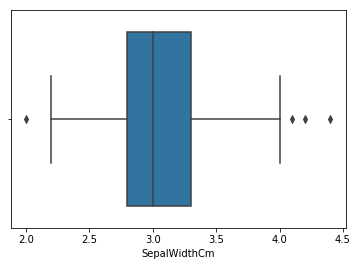

In [29]:
sns.boxplot(data["SepalWidthCm"])
plt.show()

In [30]:
Q1, Q3 = data["SepalWidthCm"].quantile(q=[0.25, 0.75])  # We use the pandas.Series.quantile function to get the value of Q1 and Q3
IQR = Q3 - Q1  # Calculating the Inter Quartile range(IQR)

data_wo_outliers = data_copy[(data_copy["SepalWidthCm"] > (Q1 - IQR*1.5)) & (data_copy["SepalWidthCm"] < (Q3 + IQR*1.5))]
print(data_wo_outliers.shape)
print("{} samples were outliers".format(150-data_wo_outliers.shape[0]))

(146, 4)
4 samples were outliers


Neither the dataset we have is large nor do we have a lot of outliers. Still we can try to remove the outliers and see if it helps. After all in machine learning "Trial and Error" is the way forward so we should try out the things before jumping to any conclusion by guessing.

In [31]:
y_wo_outliers = data_wo_outliers["Species"]
X_wo_outliers = data_wo_outliers.drop(columns="Species")

X_copy_train, X_copy_test, y_copy_train, y_copy_test = train_test_split(X_wo_outliers, y_wo_outliers, test_size=0.2, random_state=seed)

In [32]:
svc = SVC(C=C, kernel=kernel)
svc.fit(X_copy_train, y_copy_train)

print(" Removed Outliers ".center(50, "="))

print("Training set classification report".center(50, "_"))
print(classification_report(y_copy_train, svc.predict(X_copy_train)))

print("Test set classification report".center(50, "_"))
print(classification_report(y_copy_test, svc.predict(X_copy_test)))

================ Removed Outliers ================
________Training set classification report________
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       0.97      0.92      0.95        39
 Iris-virginica       0.93      0.97      0.95        38

       accuracy                           0.97       116
      macro avg       0.97      0.97      0.97       116
   weighted avg       0.97      0.97      0.97       116

__________Test set classification report__________
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



As we see it doesn't helps. No problem, we tried.

## Conclusion
1. We analysed and visualized the different features, their relation with other features and with the output variable.
2. All the features we had were continuous in nature so we had to mostly rely on the distribution of data and related plots to visualize it.
>When you would work with categorical features then can explore other types of plots and get the idea or difference between working with categorical features or continuous features or ordinal features.
3. We got an accuracy of 97% on both train and test dataset, which is a satisfying result.

Finally we arrived at the end of this kernel.

It is my first public kernel and had been working on it for many days (yeah on this simple iris dataset I've been spending days) worrying that if I'm doing something wrong, missing something or overdoing it. But finally I did it!

Hope you liked this kernel and learned something new from it, then **<span style='color:blue'>please motivate me by upvoting this kernel.</span>**

If I did something wrong then please do comment it, I'm always ready to improve myself.

### Thanks alot for going through this kernel. Keep Learning, Keep growing!